In [2]:
import pandas as pd
from plotly import graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open("pGPT.txt", 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data += [[x.strip() for x in  line.strip().split("::")]]

In [4]:
def isnumber(x):
    try:
        float(x)
        return float(x)
    except:
        return np.nan
def isint(x):
    try:
        int(x)
        return int(x)
    except:
        return np.nan  

In [5]:
df1 = pd.DataFrame([[x[0]] +[float(i) for i in x[1:]] for x in data if x[0] =="run_time"])

In [6]:
df1.loc[0][1] / df1.loc[1][1]

8.87323516378757

Text(0, 0.5, 'time in seconds')

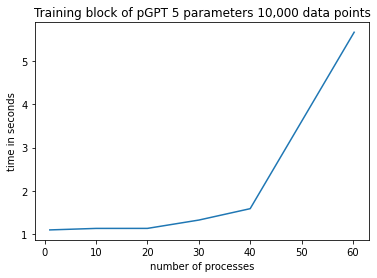

In [7]:
X = df1.to_numpy()
X =np.array(sorted(X,key=lambda x:x[2],reverse=True))
fig, (ax) = plt.subplots() 

ax.plot(10000/X[1:,2],X[1:,1]*10000/X[1:,2]/df1.loc[0][1])
ax.set_title("Training block of pGPT 5 parameters 10,000 data points")
ax.set_xlabel("number of processes")
ax.set_ylabel("time in seconds")

Text(0, 0.5, 'parallel efficiency')

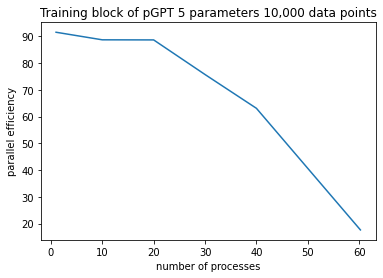

In [8]:
X = df1.to_numpy()
X =np.array(sorted(X,key=lambda x:x[2],reverse=True))
fig, (ax) = plt.subplots() 

ax.plot(10000/X[1:,2],df1.loc[0][1]*X[1:,2]/X[1:,1]/100)
ax.set_title("Training block of pGPT 5 parameters 10,000 data points")
ax.set_xlabel("number of processes")
ax.set_ylabel("parallel efficiency")

In [9]:
df = pd.DataFrame([[x[0]] +[float(i) for i in x[1:]] for x in data if x[0] =="communication_time"])

In [10]:
df.loc[0][1] / df.loc[1][1]

0.009747358571288058

In [11]:
(df.loc[1][1] - df.loc[0][1]) / df1.loc[1][1]

0.0007397826620953739

In [12]:
df.loc[1][0]

'communication_time'

In [13]:
import re
non_decimal = re.compile(r'[^\d.]+')

df = pd.DataFrame([x for x in data if x[0] =="gradient_update"])

In [14]:
df[[0,1,2]]
def isnumber(x):
    try:
        float(x)
        return float(x)
    except:
        return np.nan
def isint(x):
    try:
        int(x)
        return int(x)
    except:
        return np.nan  
df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df = df[~df[1].isnull()]
df = df[~df[0].isnull()]

In [15]:
df[df[2]==1.0].median()

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning:

Mean of empty slice



1    3800.5
2       1.0
3       NaN
4       NaN
5       NaN
6       NaN
dtype: float64

In [16]:
df[df[2]==10.0].median()

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning:

Mean of empty slice



1    6358420.0
2         10.0
3          NaN
4          NaN
5          NaN
6          NaN
dtype: float64

In [17]:
6358420.0 / 2924.5

2174.1904599076765

In [18]:
df1.loc[0][1]

212409609981.0

In [19]:
(6358420 / df1.loc[1][1] )*100

0.026561771821518285

In [20]:
dfe = pd.DataFrame([x for x in data if x[0] =="epoch"])
len(dfe)

48591

In [21]:
dfe[1] = dfe[1].apply(isnumber)
dfe[2] = dfe[2].apply(isint)
dfe[3] = dfe[3].apply(isint)
dfe = dfe[~dfe[1].isnull()]
dfe = dfe[~dfe[0].isnull()]
dfe = dfe[~dfe[3].isnull()]


In [22]:
dfe[dfe[2] ==10000].median()

1    752237618.5
2        10000.0
3        10000.0
4            NaN
5            NaN
6            NaN
7            NaN
dtype: float64

In [23]:
dfe[dfe[2] ==1000].median()

1    79420128.0
2        1000.0
3        1000.0
4           NaN
5           NaN
6           NaN
7           NaN
dtype: float64

In [24]:
(6358420.0)/7032124420 *100

0.09041961746177408

In [25]:
703212442.0 / 79420128.0

8.854335288908121

In [26]:
with open("pGPT_3.txt", 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data += [[x.strip() for x in  line.strip().split("::")]]

In [27]:
df = pd.DataFrame([x for x in data if x[0] =="epoch"])
df

,0,1,2,3,4,5,6,7,8
0,epoch,665.00000000000000000000,1,10000,10000,None,None,None,None
1,epoch,711.00000000000000000000,1,10000,10000,None,None,None,None
2,epoch,684.00000000000000000000,1,10000,10000,None,None,None,None
3,epoch,684.00000000000000000000,1,10000,10000,None,None,None,None
4,epoch,680.00000000000000000000,1,10000,10000,None,None,None,None
...,...,...,...,...,...,...,...,...,...
44744,epoch,1178.00000000000000000000,30,10000,300000,None,None,None,None
44745,epoch,1145.00000000000000000000,30,10000,300000,None,None,None,None
44746,epoch,1181.00000000000000000000,30,10000,300000,None,None,None,None
44747,epoch,1177.00000000000000000000,30,10000,300000,None,None,None,None


In [28]:
df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df

,0,1,2,3,4,5,6,7,8
0,epoch,665.0,1.0,10000,10000,None,None,None,None
1,epoch,711.0,1.0,10000,10000,None,None,None,None
2,epoch,684.0,1.0,10000,10000,None,None,None,None
3,epoch,684.0,1.0,10000,10000,None,None,None,None
4,epoch,680.0,1.0,10000,10000,None,None,None,None
...,...,...,...,...,...,...,...,...,...
44744,epoch,1178.0,30.0,10000,300000,None,None,None,None
44745,epoch,1145.0,30.0,10000,300000,None,None,None,None
44746,epoch,1181.0,30.0,10000,300000,None,None,None,None
44747,epoch,1177.0,30.0,10000,300000,None,None,None,None


In [29]:
print(len(df))
U = df.groupby(2).median()
U

44591


,1
2,
0.0,7.600000e+02
1.0,7.550000e+02
3.0,7.190000e+02
5.0,8.320000e+02
8.0,7.520000e+02
10.0,7.610000e+02
15.0,7.920000e+02
25.0,6.650000e+02
30.0,1.181000e+03


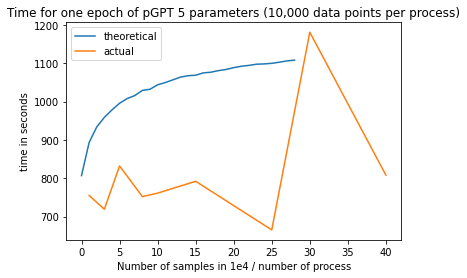

In [30]:
fig, (ax) = plt.subplots() 

l = []
K = U[1:40]
Kvar =U[1:40].var()**(0.5)
Kmean = U[1:40].mean()

for N in range(1,30):
    v = 0
    for i in range(1000):
        v +=max(np.random.normal(Kmean,Kvar,N))
    l.append(v/1000)

ax.plot(l,label="theoretical")


ax.plot(U[1:40].index,K,label="actual")
ax.set_title("Time for one epoch of pGPT 5 parameters (10,000 data points per process)")
ax.set_xlabel("Number of samples in 1e4 / number of process")
ax.set_ylabel("time in seconds")
plt.legend()


In [31]:
df1 = pd.DataFrame([[x[0]] +[float(i) for i in x[1:]] for x in data if x[0] =="run_time"])
df1= df1[3:]
df1

,0,1,2,3,4
3,run_time,237525.0,15.0,10000.0,150000.0
4,run_time,230480.0,1.0,10000.0,10000.0
5,run_time,230773.0,1.0,10000.0,10000.0
6,run_time,234305.0,1.0,10000.0,10000.0
7,run_time,218209.0,3.0,10000.0,30000.0
8,run_time,226244.0,1.0,10000.0,10000.0
9,run_time,226299.0,1.0,10000.0,10000.0
10,run_time,226728.0,1.0,10000.0,10000.0
11,run_time,226874.0,8.0,10000.0,80000.0
12,run_time,227724.0,1.0,10000.0,10000.0


<AxesSubplot:xlabel='2'>

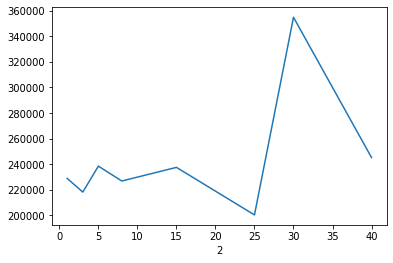

In [32]:
df1.groupby(2).mean()[1].plot()

Text(0, 0.5, 'parallel efficiency')

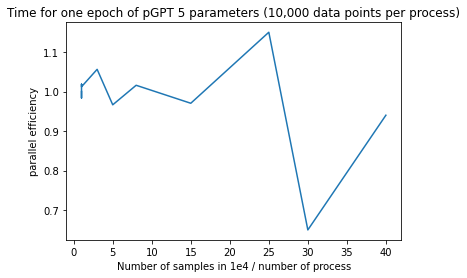

In [33]:
X = df1.to_numpy()
X =np.array(sorted(X,key=lambda x:x[2],reverse=False))
fig, (ax) = plt.subplots() 

ax.plot(X[:,2],X[0,1]/X[:,1])
ax.set_title("Time for one epoch of pGPT 5 parameters (10,000 data points per process)")
ax.set_xlabel("Number of samples in 1e4 / number of process")
ax.set_ylabel("parallel efficiency")

In [34]:
X

array([['run_time', 230480.0, 1.0, 10000.0, 10000.0],
       ['run_time', 230773.0, 1.0, 10000.0, 10000.0],
       ['run_time', 234305.0, 1.0, 10000.0, 10000.0],
       ['run_time', 226244.0, 1.0, 10000.0, 10000.0],
       ['run_time', 226299.0, 1.0, 10000.0, 10000.0],
       ['run_time', 226728.0, 1.0, 10000.0, 10000.0],
       ['run_time', 227724.0, 1.0, 10000.0, 10000.0],
       ['run_time', 218209.0, 3.0, 10000.0, 30000.0],
       ['run_time', 238486.0, 5.0, 10000.0, 50000.0],
       ['run_time', 226874.0, 8.0, 10000.0, 80000.0],
       ['run_time', 237525.0, 15.0, 10000.0, 150000.0],
       ['run_time', 200384.0, 25.0, 10000.0, 250000.0],
       ['run_time', 354806.0, 30.0, 10000.0, 300000.0],
       ['run_time', 245177.0, 40.0, 10000.0, 400000.0]], dtype=object)

In [35]:
df = pd.DataFrame([x for x in data if x[0] =="loss"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)
df[4] = df[4].apply(isint)
df[5] = df[5].apply(isint)

df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]
df = df[~df[4].isnull()]
df = df[~df[5].isnull()]


In [36]:
df.pivot(index=2, columns=3)

ValueError: Index contains duplicate entries, cannot reshape

In [40]:
with open("pGPT_5txt", 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data += [[x.strip() for x in  line.strip().split("::")]]

In [361]:
df = pd.DataFrame([x for x in data if x[0] =="run_time"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
X = (df.groupby(2).mean()/1e4)
X

,1
2,
1,23.546467
2,11.259700
3,7.531700
5,4.446800
8,2.910500
10,2.462800
15,1.980950
20,0.716200
25,1.473000


Text(0, 0.5, 'parallel efficiency')

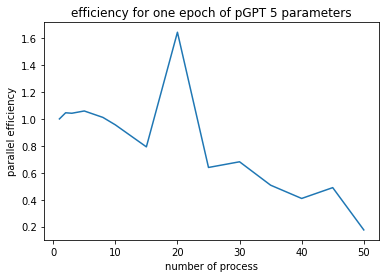

In [362]:
fig, (ax) = plt.subplots() 
ax.plot(X.index,X.iloc[0][1]/X[1]/X.index)
ax.set_title("efficiency for one epoch of pGPT 5 parameters")
ax.set_xlabel("number of process")
ax.set_ylabel("parallel efficiency")

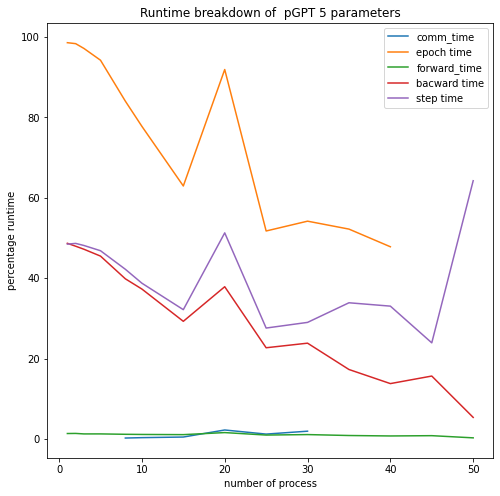

In [365]:
fig, (ax) = plt.subplots(figsize=(8, 8)) 
#ax.plot(X)
ax.plot(Y.index,Y[1].to_numpy()*100/X.loc[list(Y.index)].to_numpy().T[0]/10,label = "comm_time")
ax.plot(Z.index,Z[1].to_numpy()*100*30/X.loc[list(Z.index)].to_numpy().T[0],label = "epoch time")
ax.plot(U.index,U[1].to_numpy()*100*30/X.loc[list(U.index)].to_numpy().T[0],label = "forward_time")
ax.plot(V.index,V[1].to_numpy()*100*30/X.loc[list(V.index)].to_numpy().T[0],label = "bacward time")
ax.plot(LL.index,LL[1].to_numpy()*100*30/X.loc[list(LL.index)].to_numpy().T[0],label = "step time")
#ax.plot(ZZ.index,ZZ[1].to_numpy()*100*20/X.loc[list(ZZ.index)].to_numpy().T[0],label = "gradient comm time")

ax.set_title("Runtime breakdown of  pGPT 5 parameters")
ax.set_xlabel("number of process")
ax.set_ylabel("percentage runtime")
ax.legend()

In [292]:
X.loc[list(LL.index)].to_numpy().T[0]

array([23.31   , 11.2597 ,  7.5317 ,  4.4468 ,  2.9105 ,  2.4628 ,
        1.98095,  0.7162 ,  1.473  ,  1.1515 ,  1.3249 ,  1.4385 ,
        1.0687 ,  2.683  ])

In [164]:
#X.loc[list(Z.index)]
Z.index

Float64Index([          0.0,           1.0,           2.0,           3.0,
                        5.0,           8.0,          10.0,          15.0,
                       20.0,          25.0,          30.0,          35.0,
                       40.0,          45.0,          50.0,          75.0,
                      100.0,         171.0,         173.0,         200.0,
                      222.0,         285.0,         333.0,         452.0,
                      500.0,        4222.0,    26445312.0,    40000000.0,
              20000000000.0],
             dtype='float64', name=2)

In [147]:
Y[1].to_numpy()/X.loc[list(Y.index)].to_numpy().T[0]

array([0.00249064, 0.00344501, 0.00495688, 0.0224917 , 0.01228576,
       0.01952115])

In [350]:
df = pd.DataFrame([x for x in data if x[0] =="communication_time"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)

df[5] = df[5].apply(isint)

df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]
Y = (df.groupby(5).median()/1e9)
df = pd.DataFrame([x for x in data if x[0] =="epoch"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)

df[5] = df[5].apply(isint)

df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]
Z= (df.groupby(2).median()/1e9)
Z = Z[1:40]


df = pd.DataFrame([x for x in data if x[0] =="forward_time"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]

U= df.groupby(2).median()/1e9
U = U.loc[[x for x in U.index if x in X.index]]

df = pd.DataFrame([x for x in data if x[0] =="backward_time"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]

V= df.groupby(2).median()/1e9
V = V.loc[[x for x in V.index if x in X.index]]


df = pd.DataFrame([x for x in data if x[0] =="step_time"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]

LL = df.groupby(2).median()/1e9
LL = LL.loc[[x for x in LL.index if x in X.index]]

df = pd.DataFrame([x for x in data if x[0] =="gradient_update"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]

ZZ = df.groupby(2).agg(percentile_80 = (1,lambda x: x.quantile(0.8)))/1e9
ZZ = ZZ.loc[[x for x in ZZ.index if x in X.index and x not in [3,10]]]

In [360]:
LL*30

,1
2,
1.0,11.408755
2.0,5.476373
3.0,3.623962
5.0,2.081782
8.0,1.228349
10.0,0.954112
15.0,0.637080
20.0,0.367076
25.0,0.406419


In [359]:
X

,1
2,
1,23.31000
2,11.25970
3,7.53170
5,4.44680
8,2.91050
10,2.46280
15,1.98095
20,0.71620
25,1.47300


In [701]:
with open("pGPT_9.txt", 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data += [[x.strip() for x in  line.strip().split("::")]]

FileNotFoundError: [Errno 2] No such file or directory: 'pGPT_9.txt'

In [697]:
df = pd.DataFrame([x for x in data if x[0] =="matrix_mul"])

df[1] = df[1].apply(isnumber)
df[2] = df[2].apply(isint)
df[3] = df[3].apply(isint)


df = df[~df[1].isnull()]
df = df[~df[0].isnull()]
df = df[~df[2].isnull()]
df = df[~df[3].isnull()]
dfu = df.groupby(3).median()/1e9
dfu

,1,2
3,,
1,0.008141,0.000000e+00
3,0.031887,0.000000e+00
5,0.056471,3.000000e-09
10,0.086367,3.500000e-09
15,0.126145,1.150000e-08
20,0.176124,8.500000e-09
25,0.227571,8.000000e-09
30,0.314976,1.100000e-08


Text(0, 0.5, 'Runtime (s)')

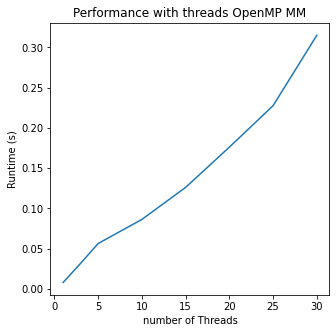

In [698]:
fig, (ax) = plt.subplots(figsize=(5, 5)) 
ax.plot(dfu[1])
ax.set_title("Performance with threads OpenMP MM")
ax.set_xlabel("number of Threads")
ax.set_ylabel("Runtime (s)")

In [699]:
df[[0,2,3]].groupby([3,2]).count()

0
3  2        
1  0.0   300
3  0.0   294
   1.0     3
   2.0     3
5  0.0    14
   1.0    35
   2.0    20
   3.0    39
   4.0    37
10 1.0     1
   2.0     3
   3.0     1
   4.0     1
   8.0     2
   9.0     2
15 2.0     1
   3.0     1
   4.0     1
   8.0     1
   11.0    1
   12.0    2
   13.0    2
   14.0    1
20 4.0     2
   7.0     2
   8.0     1
   9.0     2
   11.0    2
   12.0    1
25 4.0     1
   5.0     2
   6.0     1
   7.0     1
   9.0     1
   19.0    1
   22.0    2
   24.0    1
30 2.0     1
   4.0     1
   6.0     1
   9.0     1
   10.0    1
   12.0    1
   15.0    1
   17.0    2
   24.0    1